In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore, probplot

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [4]:
df = pd.read_csv('retail_store_inventory.csv')
print(df.shape)
df.head()

(73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


Basic Info and Summary

In [5]:
# Display basic dataset information
print("Basic Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


Checking and Visualizing the Missing Values

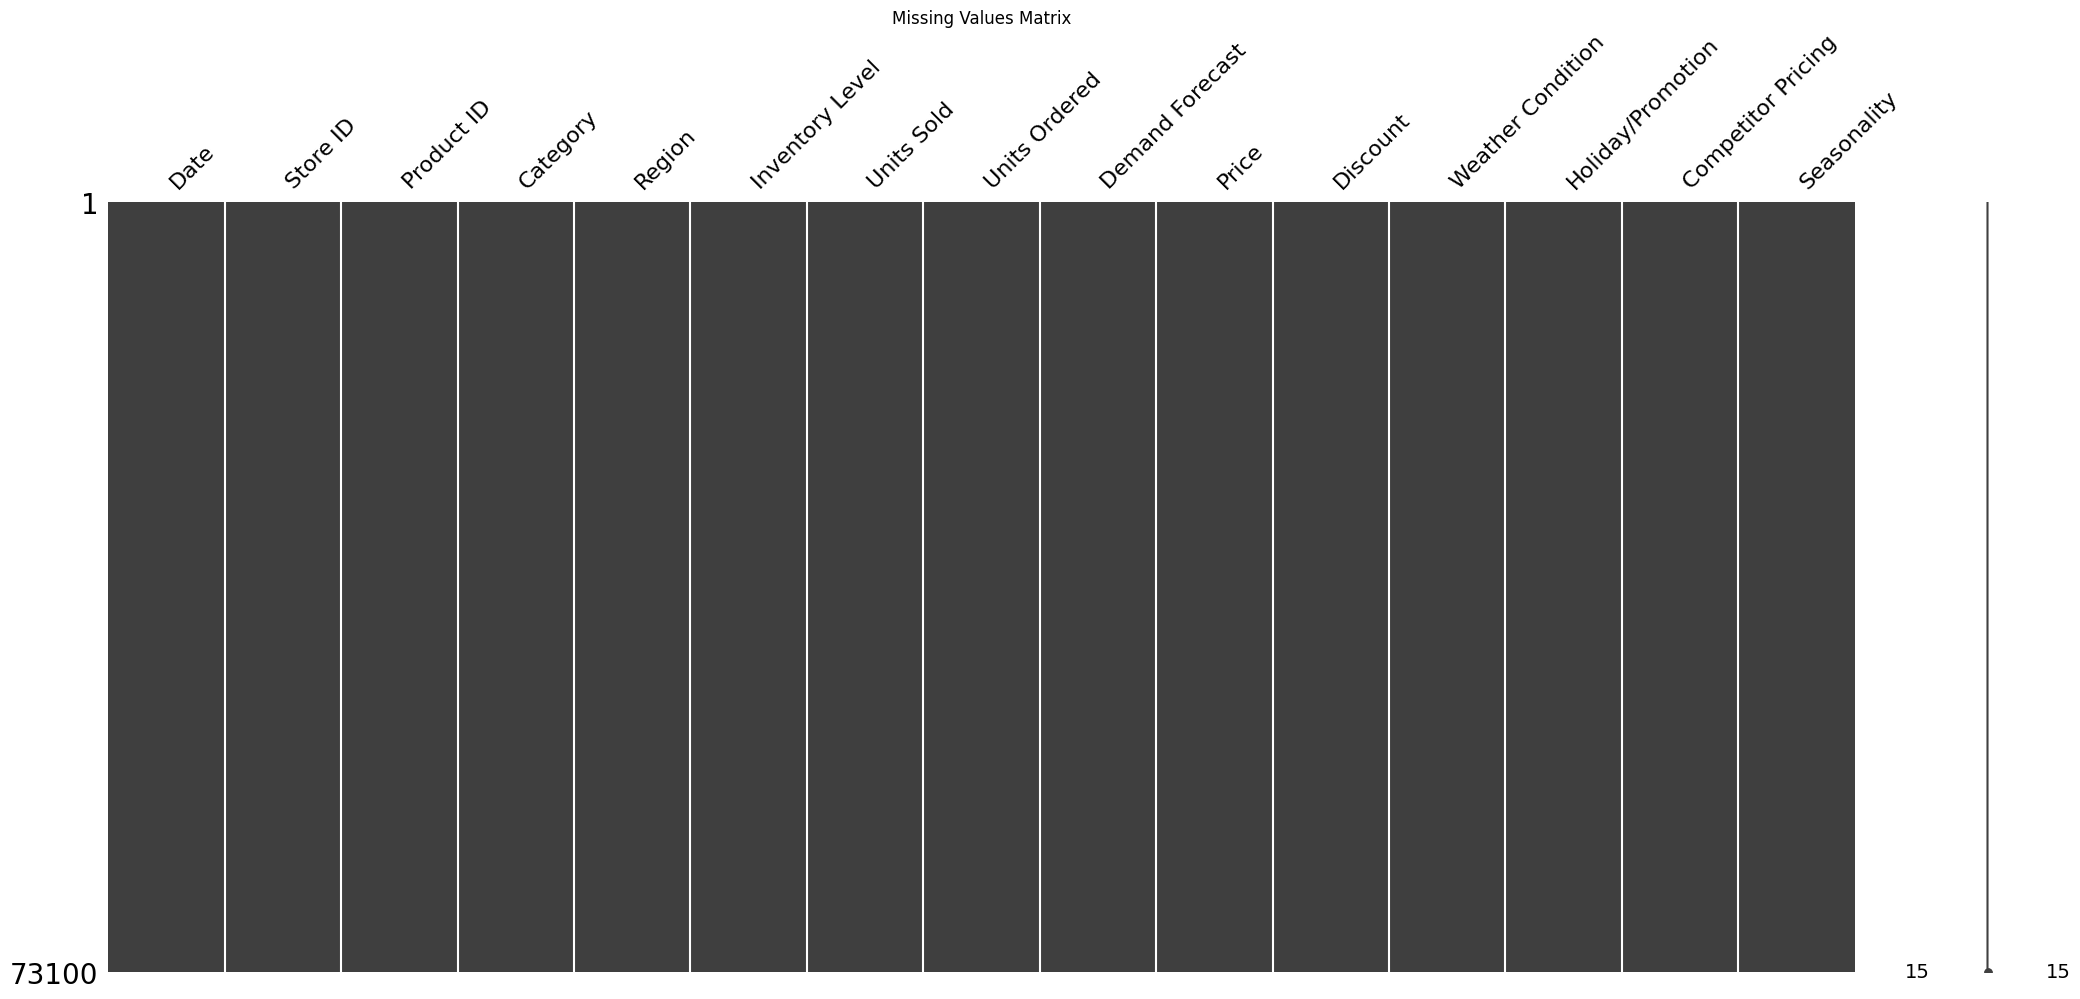


Missing Value Statistics:


,Missing Values,Percentage


In [6]:
# Visualizing missing values using missingno
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Checking missing value statistics
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

# Display only columns with missing values
print("\nMissing Value Statistics:")
display(missing_data[missing_data["Missing Values"] > 0])


In [7]:
# Count missing values per column
missing_values = df.isnull().sum()

# Print only columns with missing values
print("Missing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
Series([], dtype: int64)


In [8]:
df.duplicated().sum()

0

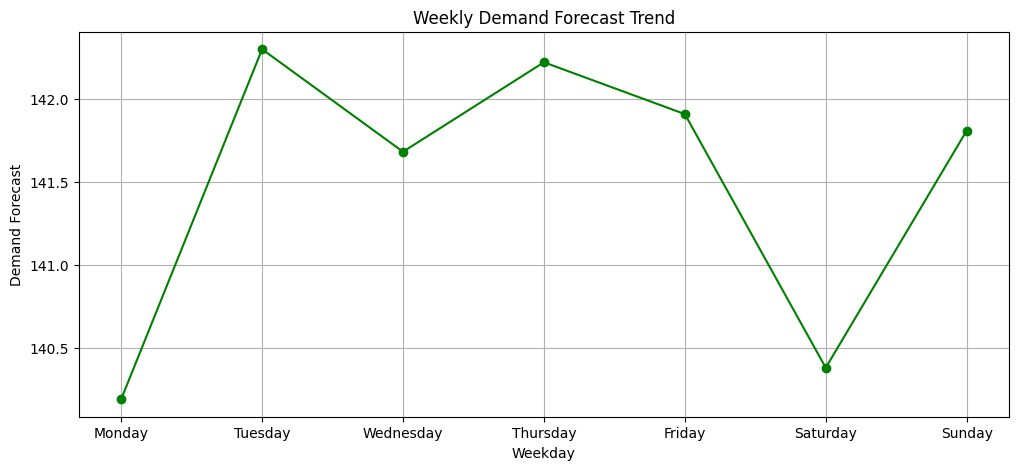

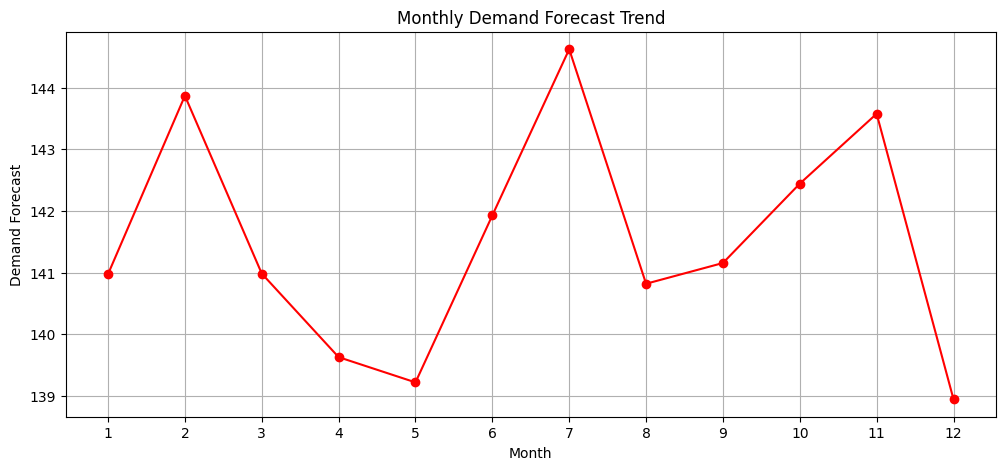

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (assuming df is already loaded)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Weekday'] = df['Date'].dt.day_name()  # Extract Weekday name
df['Month'] = df['Date'].dt.month  # Extract Month

# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Weekday and take mean demand forecast
weekday_trend = df.groupby('Weekday')['Demand Forecast'].mean().reindex(weekday_order)

# Group by Month and take mean demand forecast
monthly_trend = df.groupby('Month')['Demand Forecast'].mean()

# Line Plot: Demand Forecast vs Weekday
plt.figure(figsize=(12, 5))
plt.plot(weekday_trend.index, weekday_trend.values, marker='o', linestyle='-', color='green')
plt.xlabel('Weekday')
plt.ylabel('Demand Forecast')
plt.title('Weekly Demand Forecast Trend')
plt.grid(True)
plt.show()

# Line Plot: Demand Forecast vs Month
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Demand Forecast')
plt.title('Monthly Demand Forecast Trend')
plt.xticks(range(1, 13))  # Set x-axis from 1 to 12 (months)
plt.grid(True)
plt.show()


In [10]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Month
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Saturday,1
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Saturday,1
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Saturday,1
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Saturday,1
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Saturday,1


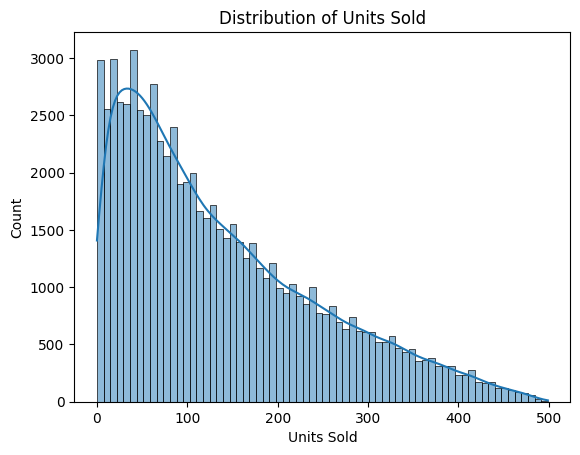

In [11]:
# Histogram with KDE (Kernel Density Estimate)-> Help To Estimate The Data Whether Skewed Or Not
sns.histplot(df['Units Sold'], kde=True)
plt.title("Distribution of Units Sold")
plt.show()
# SO It's an Right Skewed Data -> IQR can be applied

IQR

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove invalid Demand Forecast values
df = df[df['Demand Forecast'] > 0]

# Detect & Remove Outliers using IQR (Best for Right-Skewed Data)
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove extreme outliers
df = df[(df['Demand Forecast'] >= lower_bound) & (df['Demand Forecast'] <= upper_bound)]



In [13]:
print(df['Demand Forecast'].max())
print(df['Demand Forecast'].min())

440.46
0.01


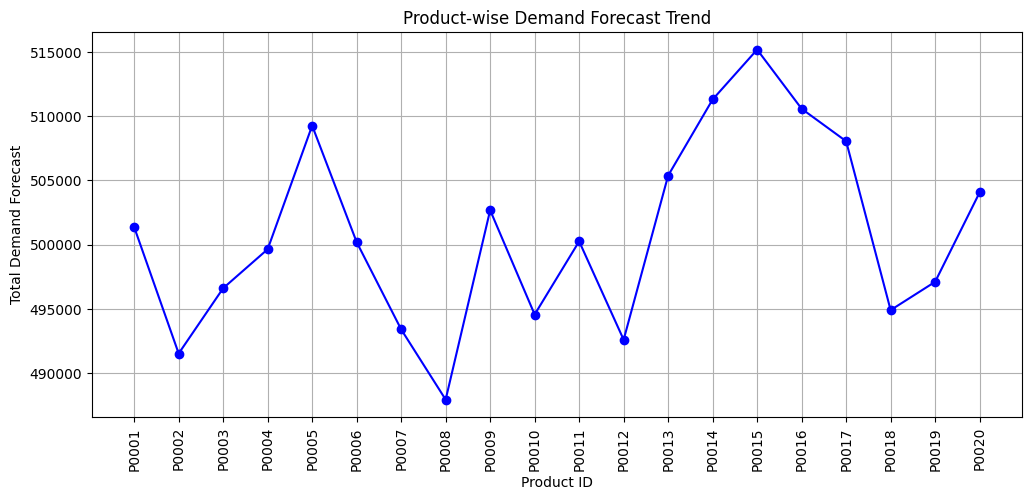

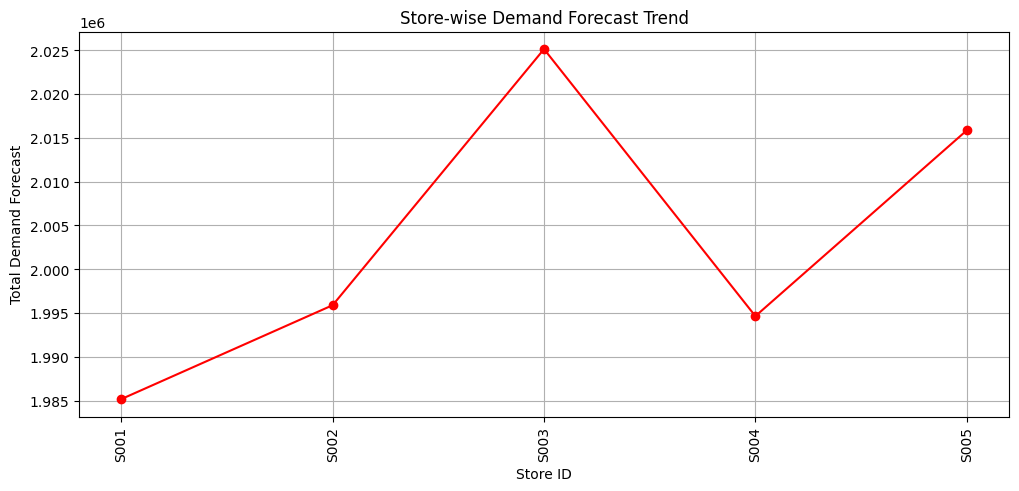

In [14]:
# Aggregate Demand Forecast by Product ID
product_trend = df.groupby('Product ID')['Demand Forecast'].sum()

# Aggregate Demand Forecast by Store ID
store_trend = df.groupby('Store ID')['Demand Forecast'].sum()

# Plot: Product-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(product_trend.index, product_trend.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Demand Forecast')
plt.title('Product-wise Demand Forecast Trend')
plt.xticks(rotation=90)  # Rotate for readability
plt.grid(True)
plt.show()

# Plot: Store-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(store_trend.index, store_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Store ID')
plt.ylabel('Total Demand Forecast')
plt.title('Store-wise Demand Forecast Trend')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [15]:
import pandas as pd

# Check unique values in categorical columns
categorical_cols = ['Weather Condition', 'Seasonality', 'Region', 'Category', 'Weekday']
for col in categorical_cols:
    print(f"Unique values in {col}:", df[col].unique())


Unique values in Weather Condition: ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Unique values in Seasonality: ['Autumn' 'Summer' 'Winter' 'Spring']
Unique values in Region: ['North' 'South' 'West' 'East']
Unique values in Category: ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Unique values in Weekday: ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


Ensuring Data Analysis

In [16]:
df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' is in datetime format
df['Month'] = df['Date'].dt.month       # Extract Month
df.head()  # Verify the new 'Month' column


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Month
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Saturday,1
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Saturday,1
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Saturday,1
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Saturday,1
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Saturday,1


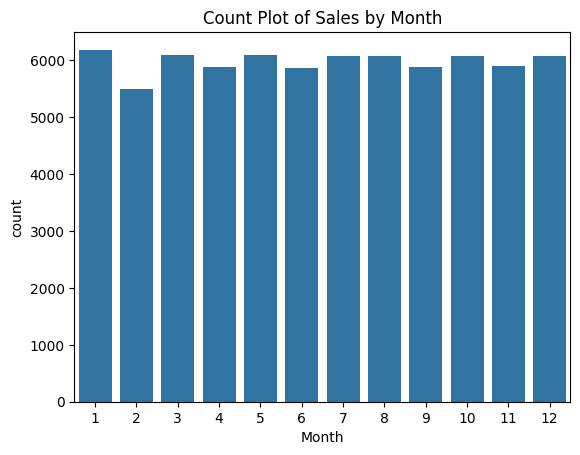

In [17]:
sns.countplot(x='Month', data=df)
plt.title("Count Plot of Sales by Month")
plt.show()


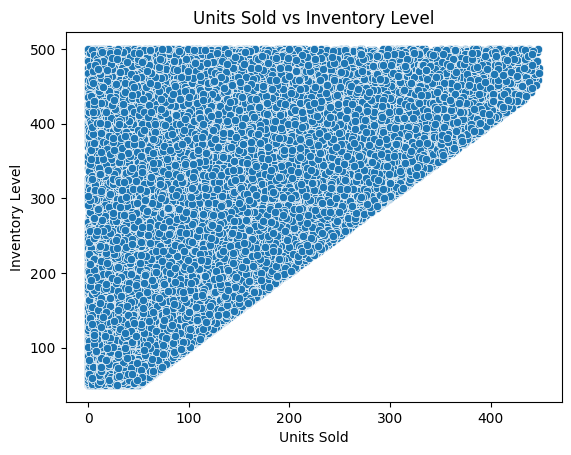

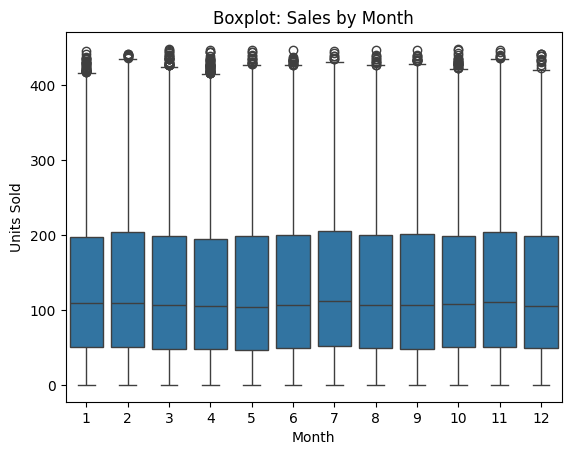

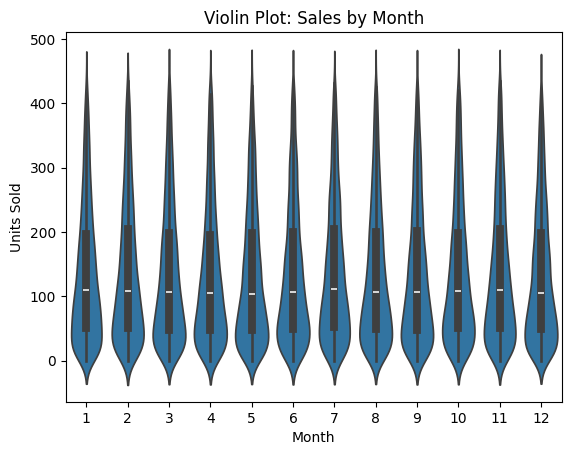

In [18]:
# Scatter plot for numerical relationships
sns.scatterplot(x='Units Sold', y='Inventory Level', data=df)
plt.title("Units Sold vs Inventory Level")
plt.show()

# Boxplot for sales by Month
sns.boxplot(x='Month', y='Units Sold', data=df)
plt.title("Boxplot: Sales by Month")
plt.show()

# Violin Plot: Units Sold by Month
sns.violinplot(x='Month', y='Units Sold', data=df)
plt.title("Violin Plot: Sales by Month")
plt.show()


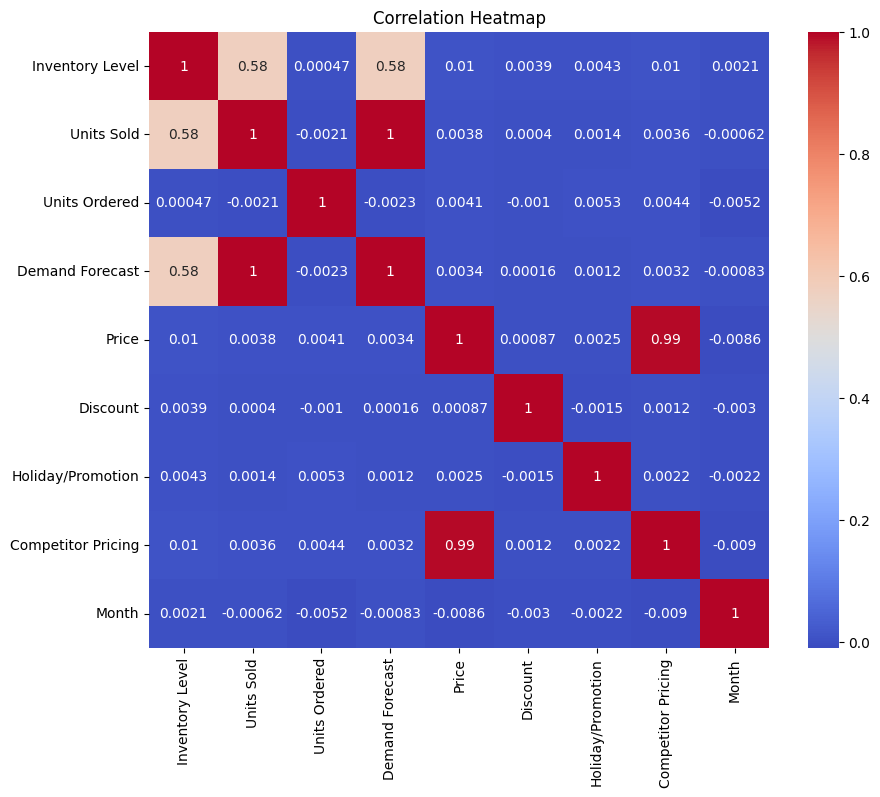

In [19]:
numeric_data = df.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

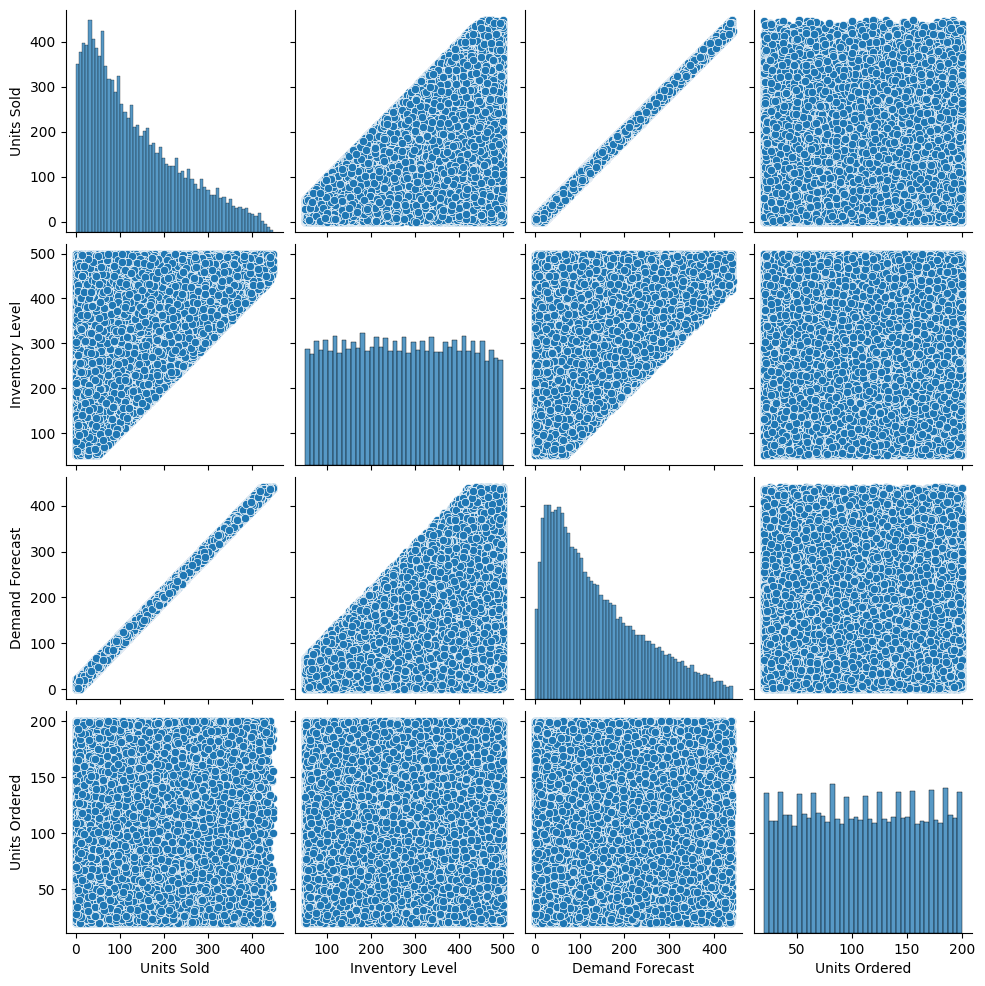

In [20]:
selected_features = ['Units Sold', 'Inventory Level', 'Demand Forecast', 'Units Ordered']

# Check if selected features are numeric
for feature in selected_features:
    if feature not in numeric_data.columns:
        print(f"Skipping '{feature}' because it is not numeric.")
else:
    sns.pairplot(df[selected_features])
    plt.show()

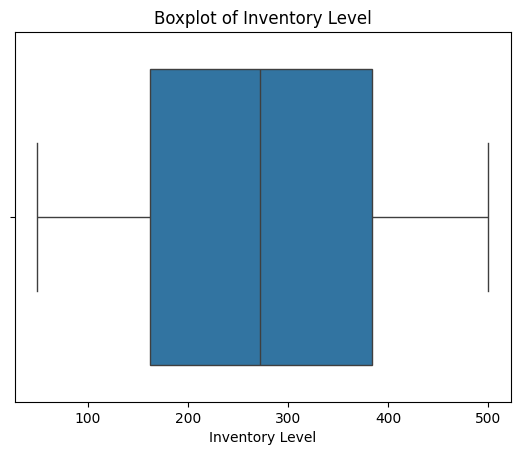

In [21]:
# Boxplot to detect outliers in numerical columns
sns.boxplot(x=df['Inventory Level'])
plt.title("Boxplot of Inventory Level")
plt.show()

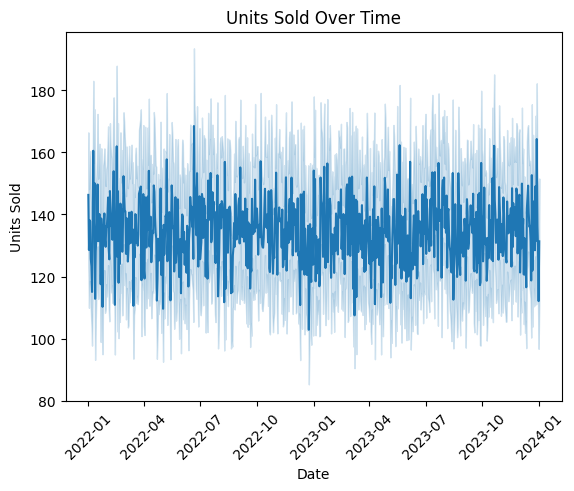

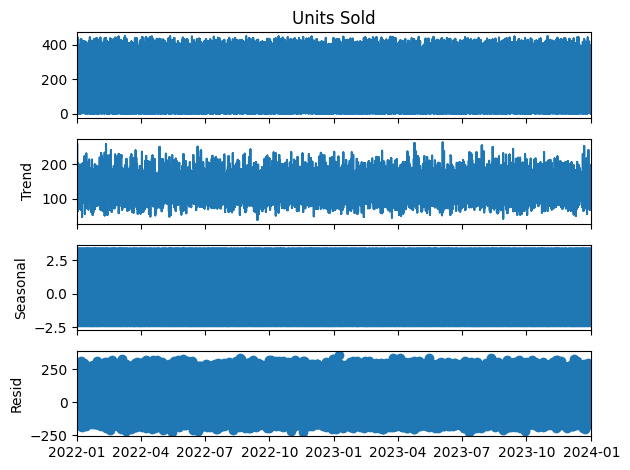

In [22]:
# Convert to datetime and plot time series
df['Date'] = pd.to_datetime(df['Date'])
sns.lineplot(x='Date', y='Units Sold', data=df)
plt.title("Units Sold Over Time")
plt.xticks(rotation=45)
plt.show()

# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.set_index('Date')['Units Sold'], model='additive', period=12)
decomposition.plot()
plt.show()

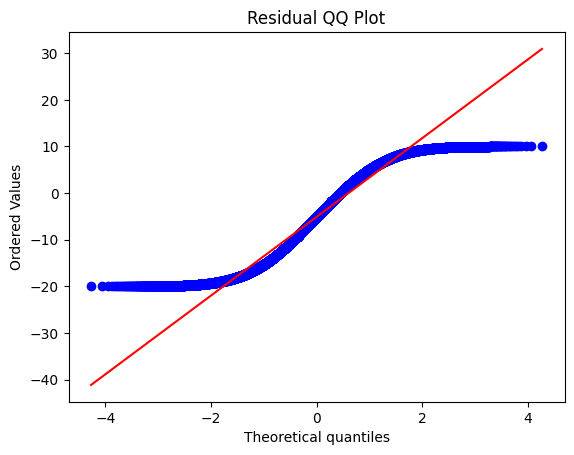

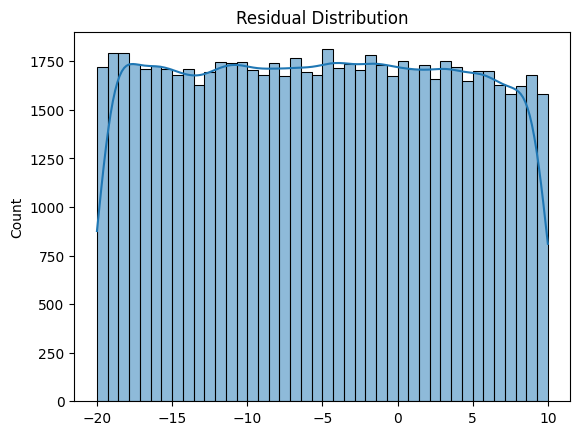

In [23]:
residuals = df['Units Sold'] - df['Demand Forecast']
probplot(residuals, dist='norm', plot=plt)
plt.title("Residual QQ Plot")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

Checking The Permuation features So training the BorutaPy and Finding The PCA and Permuatation Importance 

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Feature Engineering
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data.drop(columns=['Date'], inplace=True)

# Define the target and features
target_variable = 'Units Sold'  # Change this if needed
X_features = data.drop(columns=[target_variable])
y_target = data[target_variable]

# Feature Selection using Boruta
rf_selector = RandomForestRegressor(n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf_selector, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X_features.values, y_target.values)
selected_features_perm = X_features.columns[boruta_selector.support_]

# Filter selected features
X_selected_perm = X_features[selected_features_perm]

# Standardization
scaler_perm = StandardScaler()
X_scaled_perm = scaler_perm.fit_transform(X_selected_perm)

C:\Users\sivas\AppData\Local\Temp\ipykernel_22288\2625508641.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


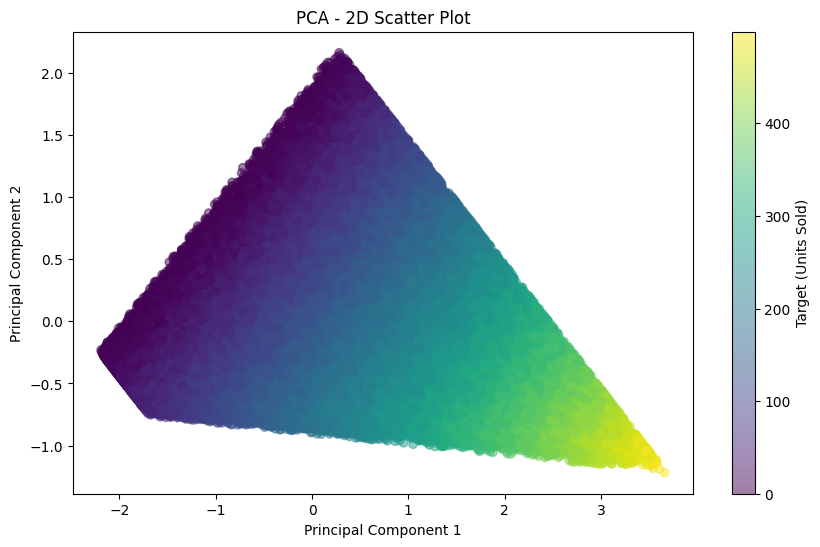

✅ PCA visualization completed before model training!


In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_perm)

# 📌 Plot PCA 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_target, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Scatter Plot")
plt.colorbar(label="Target (Units Sold)")
plt.show()

print("✅ PCA visualization completed before model training!")

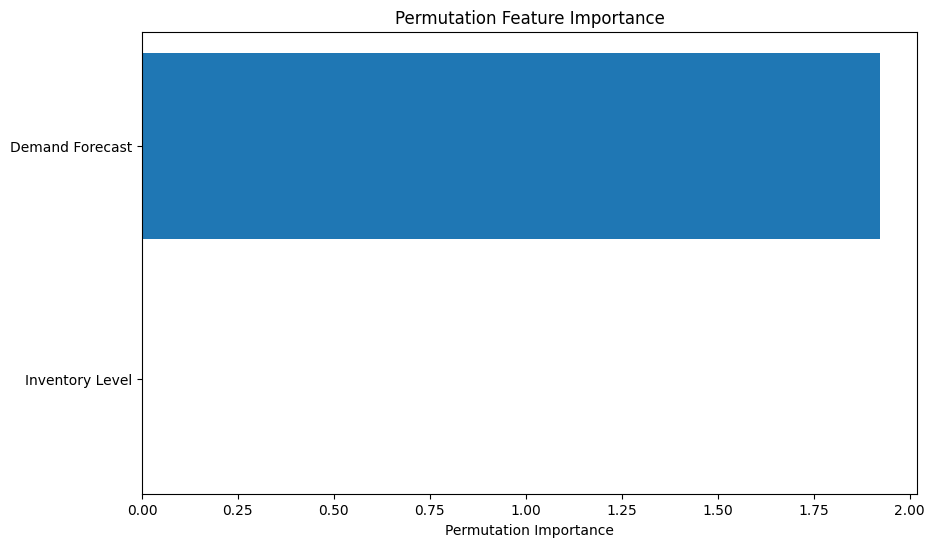

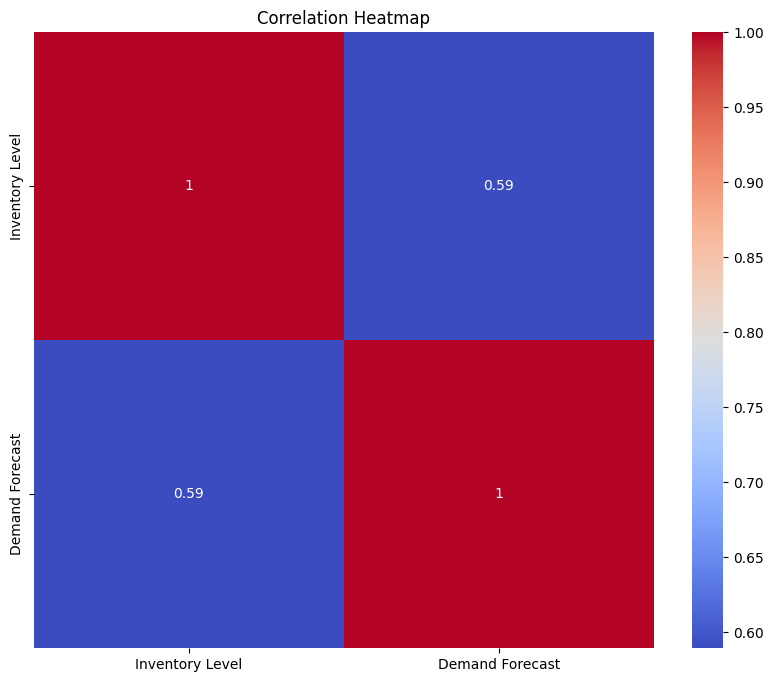

✅ Permutation importance and correlation analysis completed successfully!


In [26]:
# Split the data
X_train_perm, X_test_perm, y_train_perm, y_test_perm = train_test_split(X_scaled_perm, y_target, test_size=0.2, random_state=42)

# Convert back to DataFrame to retain feature names after scaling
X_train_perm_df = pd.DataFrame(X_train_perm, columns=selected_features_perm)
X_test_perm_df = pd.DataFrame(X_test_perm, columns=selected_features_perm)

# Train a RandomForestRegressor
rf_model_perm = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_perm.fit(X_train_perm_df, y_train_perm)

# ✅ Compute Permutation Feature Importance
perm_importance_perm = permutation_importance(rf_model_perm, X_test_perm_df, y_test_perm, n_repeats=10, random_state=42)

# 📌 Plotting Feature Importances
sorted_idx = perm_importance_perm.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X_test_perm_df.columns[sorted_idx], perm_importance_perm.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

# ✅ Display Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_perm_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

print("✅ Permutation importance and correlation analysis completed successfully!")


# CREATING NEW COLUMNS

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv("retail_store_inventory.csv")

# Debug: Check existing columns
print("Before Adding Columns:", df.columns)

# Convert necessary columns to numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").fillna(0)
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce").fillna(0)
df["Competitor Pricing"] = pd.to_numeric(df["Competitor Pricing"], errors="coerce").fillna(0)

# Add computed columns
df["Sales Velocity"] = df["Units Sold"] / (df["Inventory Level"] + 1)  # Avoid division by zero
df["Effective Price"] = df["Price"] * (1 - df["Discount"] / 100)
df["Competitive Price Gap"] = df["Competitor Pricing"] - df["Effective Price"]

# Debug: Check if new columns exist
print("\nAfter Adding Columns:", df.columns)

# Display first 5 rows to verify
print("\nFirst 5 Rows of New Columns:")
print(df[["Sales Velocity", "Effective Price", "Competitive Price Gap"]].head())


Before Adding Columns: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

After Adding Columns: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Sales Velocity',
       'Effective Price', 'Competitive Price Gap'],
      dtype='object')

First 5 Rows of New Columns:
   Sales Velocity  Effective Price  Competitive Price Gap
0        0.547414           26.800                  2.890
1        0.731707           50.408                 15.752
2        0.631068           25.191                  6.129
3        0.129787           29.448                  5.292
4        0.08

In [28]:
print(df.columns)  # Verify if required columns exist


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Sales Velocity',
       'Effective Price', 'Competitive Price Gap'],
      dtype='object')


Proving That These Columns Are Helpful 

Sales Velocity


📌 Correlation Analysis:
+-----------------------+------------------+
| index                 |   Sales Velocity |
+=======================+==================+
| Inventory Level       |     -0.000559    |
+-----------------------+------------------+
| Units Sold            |      0.729776    |
+-----------------------+------------------+
| Units Ordered         |     -0.000941172 |
+-----------------------+------------------+
| Demand Forecast       |      0.727181    |
+-----------------------+------------------+
| Price                 |     -0.00432883  |
+-----------------------+------------------+
| Discount              |     -0.00058262  |
+-----------------------+------------------+
| Holiday/Promotion     |     -0.00294767  |
+-----------------------+------------------+
| Competitor Pricing    |     -0.0041677   |
+-----------------------+------------------+
| Sales Velocity        |      1           |
+-----------------------+------------------+
| Effective Price       |     

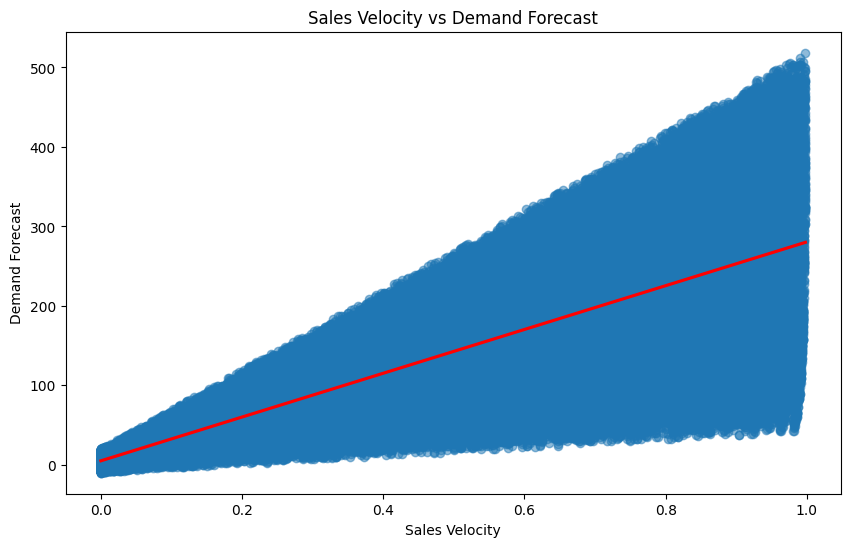

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # Ensure you have tabulate installed (pip install tabulate)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation with Sales Velocity
correlation_matrix = numeric_df.corr()[["Sales Velocity"]].reset_index()

# Compute variance of Sales Velocity
variance = df["Sales Velocity"].var()

# Display correlation analysis in a clean table
print("\n📌 Correlation Analysis:")
print(tabulate(correlation_matrix, headers="keys", tablefmt="grid", showindex=False))

# Display variance analysis in a clean table
variance_df = pd.DataFrame({"Metric": ["Sales Velocity Variance"], "Value": [variance]})
print("\n📌 Variance Analysis:")
print(tabulate(variance_df, headers="keys", tablefmt="grid", showindex=False))

# ✅ Decision Rule
if variance > 0 and numeric_df["Sales Velocity"].abs().sum() > 0.5:
    print("\n✅ Conclusion: 'Sales Velocity' is useful and should be kept.")
else:
    print("\n❌ Conclusion: 'Sales Velocity' is redundant and can be dropped.")

# 📌 Scatter Plot: Sales Velocity vs Demand Forecast
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Sales Velocity"], y=df["Demand Forecast"], scatter_kws={"alpha":0.5}, line_kws={"color": "red"})

# Customize labels and title
plt.xlabel("Sales Velocity")
plt.ylabel("Demand Forecast")
plt.title("Sales Velocity vs Demand Forecast")

# Show the plot
plt.show()



📌 Correlation Analysis for Competitive Price Gap:
+-----------------------+-------------------------+
| index                 |   Competitive Price Gap |
+=======================+=========================+
| Inventory Level       |              0.00998969 |
+-----------------------+-------------------------+
| Units Sold            |              0.00464007 |
+-----------------------+-------------------------+
| Units Ordered         |              0.0034103  |
+-----------------------+-------------------------+
| Demand Forecast       |              0.00426782 |
+-----------------------+-------------------------+
| Price                 |              0.450104   |
+-----------------------+-------------------------+
| Discount              |              0.672668   |
+-----------------------+-------------------------+
| Holiday/Promotion     |             -0.00066132 |
+-----------------------+-------------------------+
| Competitor Pricing    |              0.502368   |
+------------

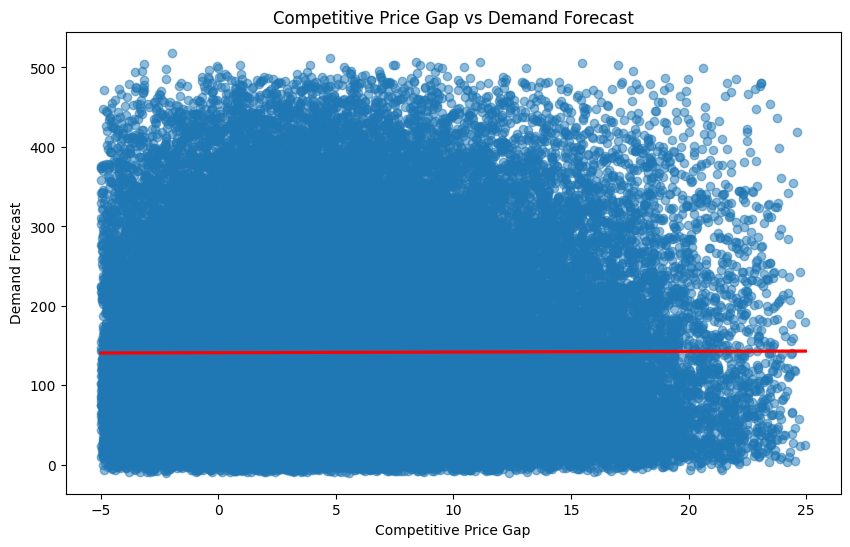


❌ Conclusion: 'Competitive Price Gap' is redundant and will be dropped.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # Ensure you have tabulate installed (pip install tabulate)

# Ensure the required columns exist before computing new columns
if "Price" in df.columns and "Discount" in df.columns:
    df["Effective Price"] = df["Price"] * (1 - df["Discount"] / 100)

if "Competitor Pricing" in df.columns and "Effective Price" in df.columns:
    df["Competitive Price Gap"] = df["Competitor Pricing"] - df["Effective Price"]
else:
    print("⚠️ Skipping Competitive Price Gap computation (missing columns).")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation for Competitive Price Gap (if exists)
if "Competitive Price Gap" in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[["Competitive Price Gap"]].reset_index()

    # Compute variance for Competitive Price Gap
    variance_df = pd.DataFrame({
        "Metric": ["Competitive Price Gap Variance"],
        "Value": [df["Competitive Price Gap"].var()]
    })

    # Display correlation analysis
    print("\n📌 Correlation Analysis for Competitive Price Gap:")
    print(tabulate(correlation_matrix, headers="keys", tablefmt="grid", showindex=False))

    # Display variance analysis
    print("\n📌 Variance Analysis for Competitive Price Gap:")
    print(tabulate(variance_df, headers="keys", tablefmt="grid", showindex=False))

    # 📌 Scatter Plot: Competitive Price Gap vs Demand Forecast (Before Dropping)
    if "Demand Forecast" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df["Competitive Price Gap"], y=df["Demand Forecast"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

        # Customize labels and title
        plt.xlabel("Competitive Price Gap")
        plt.ylabel("Demand Forecast")
        plt.title("Competitive Price Gap vs Demand Forecast")

        # Show the plot
        plt.show()
    else:
        print("⚠️ Skipping plot (Demand Forecast column not found).")

    # Decision Rule (drop if redundant, but AFTER plotting)
    if variance_df["Value"].values[0] > 0 and correlation_matrix["Competitive Price Gap"].abs().sum() > 1:
        print("\n❌ Conclusion: 'Competitive Price Gap' is redundant and will be dropped.")
        df.drop(columns=["Competitive Price Gap"], inplace=True)
    else:
        print("\n✅ Conclusion: 'Competitive Price Gap' is useful and will be kept.")
else:
    print("⚠️ Skipping correlation analysis (Competitive Price Gap not found).")



📌 Correlation Analysis for Effective Price:
+--------------------+-------------------+
| index              |   Effective Price |
+====================+===================+
| Inventory Level    |       0.00785755  |
+--------------------+-------------------+
| Units Sold         |       0.000248584 |
+--------------------+-------------------+
| Units Ordered      |       0.00422172  |
+--------------------+-------------------+
| Demand Forecast    |      -0.000116955 |
+--------------------+-------------------+
| Price              |       0.983388    |
+--------------------+-------------------+
| Discount           |      -0.162689    |
+--------------------+-------------------+
| Holiday/Promotion  |       0.00224187  |
+--------------------+-------------------+
| Competitor Pricing |       0.977293    |
+--------------------+-------------------+
| Sales Velocity     |      -0.00428721  |
+--------------------+-------------------+
| Effective Price    |       1           |
+--------

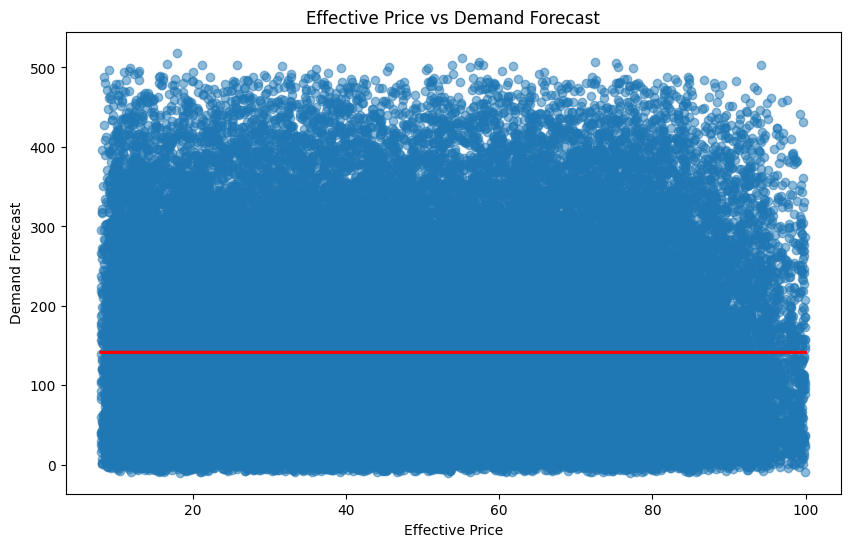


❌ Conclusion: 'Effective Price' is redundant and will be dropped.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  # Ensure you have tabulate installed (pip install tabulate)

# 📌 Compute Effective Price (Ensure required columns exist)
if "Price" in df.columns and "Discount" in df.columns:
    df["Effective Price"] = df["Price"] * (1 - df["Discount"] / 100)
else:
    print("⚠️ Skipping Effective Price computation (missing required columns).")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation for Effective Price (if exists)
if "Effective Price" in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[["Effective Price"]].reset_index()

    # Compute variance for Effective Price
    variance_df = pd.DataFrame({
        "Metric": ["Effective Price Variance"],
        "Value": [df["Effective Price"].var()]
    })

    # Display correlation analysis
    print("\n📌 Correlation Analysis for Effective Price:")
    print(tabulate(correlation_matrix, headers="keys", tablefmt="grid", showindex=False))

    # Display variance analysis
    print("\n📌 Variance Analysis for Effective Price:")
    print(tabulate(variance_df, headers="keys", tablefmt="grid", showindex=False))

    # 📌 Scatter Plot: Effective Price vs Demand Forecast (Before Dropping)
    if "Demand Forecast" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df["Effective Price"], y=df["Demand Forecast"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

        # Customize labels and title
        plt.xlabel("Effective Price")
        plt.ylabel("Demand Forecast")
        plt.title("Effective Price vs Demand Forecast")

        # Show the plot
        plt.show()
    else:
        print("⚠️ Skipping plot (Demand Forecast column not found).")

    # Decision Rule (drop if redundant, but AFTER plotting)
    if variance_df["Value"].values[0] > 0 and correlation_matrix["Effective Price"].abs().sum() > 1:
        print("\n❌ Conclusion: 'Effective Price' is redundant and will be dropped.")
        df.drop(columns=["Effective Price"], inplace=True)
    else:
        print("\n✅ Conclusion: 'Effective Price' is useful and will be kept.")
else:
    print("⚠️ Skipping correlation analysis (Effective Price not found).")


In [32]:
# Drop redundant columns
# df.drop(columns=["Competitive Price Gap", "Effective Price"], inplace=True)

In [33]:
print(df.columns)


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Sales Velocity'],
      dtype='object')


So As Per Code So We Need To Drop the Competitive Price Gap and Effective Price

Normalization For Continous Variables 

In [34]:
from sklearn.preprocessing import MinMaxScaler

# List of continuous numerical features
continuous_features = [
    "Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast",
    "Price", "Discount", "Competitor Pricing", "Sales Velocity"
]

# Initialize MinMax Scaler
scaler = MinMaxScaler()

# Apply normalization
df[continuous_features] = scaler.fit_transform(df[continuous_features])



In [35]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales Velocity
0,2022-01-01,S001,P0001,Groceries,North,0.402222,0.254509,0.194444,0.275211,0.261111,1.0,Rainy,0,0.246822,Autumn,0.548511
1,2022-01-01,S001,P0002,Toys,South,0.342222,0.300601,0.255556,0.291425,0.589000,1.0,Sunny,0,0.611851,Autumn,0.733174
2,2022-01-01,S001,P0003,Toys,West,0.115556,0.130261,0.172222,0.158947,0.199889,0.5,Sunny,1,0.263137,Summer,0.632333
3,2022-01-01,S001,P0004,Toys,North,0.931111,0.122244,0.800000,0.136546,0.252444,0.5,Cloudy,1,0.297368,Autumn,0.130047
4,2022-01-01,S001,P0005,Electronics,East,0.257778,0.028056,0.638889,0.036421,0.707111,0.0,Sunny,0,0.639776,Summer,0.084000


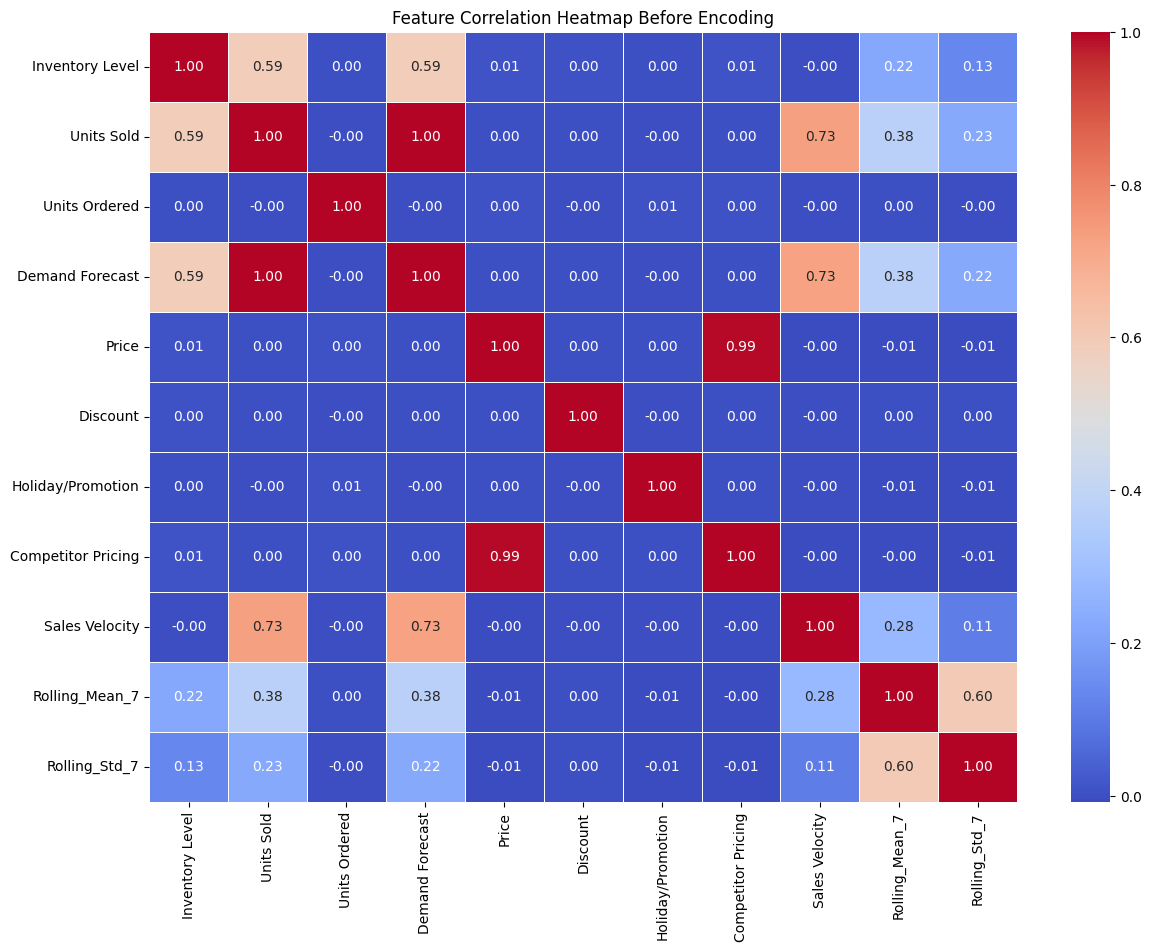

In [36]:
# 1️⃣ Rolling Statistics
df['Rolling_Mean_7'] = df['Demand Forecast'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Demand Forecast'].rolling(window=7).std()


# 4️⃣ Handle missing values (introduced by shift/rolling operations)
df.fillna(0, inplace=True)

# ------------------------------ STEP 2: CORRELATION HEATMAP ------------------------------

# Compute correlation matrix (Only numeric columns, before encoding)
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap Before Encoding')
plt.show()

DATA AFTER APPLYING LABEL AND ONE HOT ENCODING

STANDARDIZING NUMERICAL FEATURES

In [37]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Sales Velocity,Rolling_Mean_7,Rolling_Std_7
0,2022-01-01,S001,P0001,Groceries,North,0.402222,0.254509,0.194444,0.275211,0.261111,1.0,Rainy,0,0.246822,Autumn,0.548511,0.0,0.0
1,2022-01-01,S001,P0002,Toys,South,0.342222,0.300601,0.255556,0.291425,0.589000,1.0,Sunny,0,0.611851,Autumn,0.733174,0.0,0.0
2,2022-01-01,S001,P0003,Toys,West,0.115556,0.130261,0.172222,0.158947,0.199889,0.5,Sunny,1,0.263137,Summer,0.632333,0.0,0.0
3,2022-01-01,S001,P0004,Toys,North,0.931111,0.122244,0.800000,0.136546,0.252444,0.5,Cloudy,1,0.297368,Autumn,0.130047,0.0,0.0
4,2022-01-01,S001,P0005,Electronics,East,0.257778,0.028056,0.638889,0.036421,0.707111,0.0,Sunny,0,0.639776,Summer,0.084000,0.0,0.0


In [38]:
# Drop Date column (since time-based features are already created)
df.drop(columns=['Date'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Demand Forecast'])  # Independent variables
y = df['Demand Forecast']  # Target variable

In [39]:
# Identify categorical & numerical 

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns
print(categorical_cols)
print(numerical_cols)

Index(['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition',
       'Seasonality'],
      dtype='object')
Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Holiday/Promotion', 'Competitor Pricing', 'Sales Velocity',
       'Rolling_Mean_7', 'Rolling_Std_7'],
      dtype='object')


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical & numerical columns
categorical_cols = ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']
numerical_cols = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
                  'Holiday/Promotion', 'Competitor Pricing', 'Sales Velocity', 'Rolling_Mean_7', 'Rolling_Std_7']

# Ensure categorical columns are converted to strings
df[categorical_cols] = df[categorical_cols].astype(str)

# Define preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num_scaler", StandardScaler(), numerical_cols),  # Standard Scaling for numerical features
    ("cat_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # OHE for categorical features
])

# 🔹 **Fix: Use `df` instead of `X_train`**
preprocessor.fit(df)  # Fit on entire dataframe

# Transform the dataset
X_transformed = preprocessor.transform(df)

# Get feature names correctly **AFTER** fitting
numerical_feature_names = list(numerical_cols)
categorical_feature_names = list(preprocessor.named_transformers_["cat_encoder"].get_feature_names_out(categorical_cols))

# Combine both numerical and categorical feature names properly
feature_names = numerical_feature_names + categorical_feature_names

# Convert transformed data back into a DataFrame
X_final = pd.DataFrame(X_transformed, columns=feature_names)

# Display transformed dataset
X_final.head()


,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Sales Velocity,Rolling_Mean_7,Rolling_Std_7,...,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,-0.334516,-0.086899,-1.052172,-0.831423,1.410350,-0.994625,-0.971931,0.180127,-3.683124,-3.19666,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.542290,0.124268,-0.841754,0.302627,1.410350,-0.994625,0.420520,0.819150,-3.683124,-3.19666,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.327216,-0.656131,-1.128687,-1.043169,-0.001342,1.005404,-0.909697,0.470191,-3.683124,-3.19666,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.496977,-0.692855,1.032872,-0.861398,-0.001342,1.005404,-0.779119,-1.267961,-3.683124,-3.19666,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.834714,-1.124370,0.478135,0.711131,-1.413034,-0.994625,0.527044,-1.427306,-3.683124,-3.19666,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
X_final.head()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Holiday/Promotion,Competitor Pricing,Sales Velocity,Rolling_Mean_7,Rolling_Std_7,...,Region_South,Region_West,Weather Condition_Cloudy,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Autumn,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,-0.334516,-0.086899,-1.052172,-0.831423,1.410350,-0.994625,-0.971931,0.180127,-3.683124,-3.19666,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.542290,0.124268,-0.841754,0.302627,1.410350,-0.994625,0.420520,0.819150,-3.683124,-3.19666,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.327216,-0.656131,-1.128687,-1.043169,-0.001342,1.005404,-0.909697,0.470191,-3.683124,-3.19666,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.496977,-0.692855,1.032872,-0.861398,-0.001342,1.005404,-0.779119,-1.267961,-3.683124,-3.19666,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.834714,-1.124370,0.478135,0.711131,-1.413034,-0.994625,0.527044,-1.427306,-3.683124,-3.19666,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
from sklearn.model_selection import train_test_split

# Ensure X_final and y have the same number of rows
assert X_final.shape[0] == y.shape[0], "❌ X_final and y must have the same number of rows!"

# Check if stratification is possible (all classes must have ≥2 instances)
stratify_option = y if (y.nunique() > 2 and y.value_counts().min() > 1) else None

# First split: 70% training, 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=stratify_option
)

# Second split: 15% validation, 15% test (from the 30% temporary set)
stratify_temp = y_temp if (stratify_option is not None and y_temp.value_counts().min() > 1) else None
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=stratify_temp
)

# Print shapes to verify correctness
print(f"✅ Training Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"✅ Validation Set: X_valid={X_valid.shape}, y_valid={y_valid.shape}")
print(f"✅ Test Set: X_test={X_test.shape}, y_test={y_test.shape}")


✅ Training Set: X_train=(51170, 52), y_train=(51170,)
✅ Validation Set: X_valid=(10965, 52), y_valid=(10965,)
✅ Test Set: X_test=(10965, 52), y_test=(10965,)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ✅ No preprocessor inside pipeline (since data is already preprocessed)
def train_and_evaluate(model, model_name):
    pipeline = Pipeline([
        ("model", model)  # ⛔ Removed "preprocessor"
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)  # ✅ Uses already preprocessed data
    
    # Predict on validation set
    y_pred = pipeline.predict(X_valid)  
    
    # Compute evaluation metrics
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred)

    print(f"\n📌 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")  # ✅ Should be between 0 and 1

    return pipeline


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Train models
lr_model = train_and_evaluate(LinearRegression(), "Multiple Linear Regression")
svr_model = train_and_evaluate(SVR(kernel='rbf'), "Support Vector Regressor")
rf_model = train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest Regressor")
dt_model = train_and_evaluate(DecisionTreeRegressor(random_state=42), "Decision Tree Regressor")



📌 Multiple Linear Regression Performance:
MAE: 0.01
RMSE: 0.02
R² Score: 0.99

📌 Support Vector Regressor Performance:
MAE: 0.03
RMSE: 0.04
R² Score: 0.96

📌 Random Forest Regressor Performance:
MAE: 0.01
RMSE: 0.02
R² Score: 0.99

📌 Decision Tree Regressor Performance:
MAE: 0.02
RMSE: 0.02
R² Score: 0.99


In [45]:
# Function to evaluate on test set
def final_evaluation(model, model_name):
    y_pred_test = model.predict(X_test)
    
    # Metrics on test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"\n📌 FINAL TEST SET PERFORMANCE - {model_name}:")
    print(f"MAE: {mae_test:.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    print(f"R² Score: {r2_test:.2f}")

# Evaluate on test set
final_evaluation(lr_model, "Multiple Linear Regression")
final_evaluation(svr_model, "Support Vector Regressor")
final_evaluation(rf_model, "Random Forest Regressor")
final_evaluation(dt_model, "Decision Tree Regressor")



📌 FINAL TEST SET PERFORMANCE - Multiple Linear Regression:
MAE: 0.01
RMSE: 0.02
R² Score: 0.99

📌 FINAL TEST SET PERFORMANCE - Support Vector Regressor:
MAE: 0.03
RMSE: 0.04
R² Score: 0.96

📌 FINAL TEST SET PERFORMANCE - Random Forest Regressor:
MAE: 0.01
RMSE: 0.02
R² Score: 0.99

📌 FINAL TEST SET PERFORMANCE - Decision Tree Regressor:
MAE: 0.02
RMSE: 0.02
R² Score: 0.99


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


# Assuming 'df' is loaded from 'retail_store_inventory.csv'
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate data by date (sum Units Sold across all stores/products per day)
df_daily = df.groupby('Date')['Units Sold'].sum().reset_index()
df_daily.set_index('Date', inplace=True)

# Plot original time series
plt.figure(figsize=(14, 6), dpi=150)
sns.lineplot(x=df_daily.index, y='Units Sold', data=df_daily, linewidth=2, color="tab:blue")
plt.title("Units Sold Over Time (Daily Aggregate)", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Define refined period ranges around key cycles
period_ranges = {
    "Weekly": range(5, 10, 1),        # 5 to 9 days (weekly refinement)
    "Monthly": range(25, 35, 1),      # 25 to 34 days (monthly refinement)
    "Bi-Monthly": range(55, 65, 1),   # 55 to 64 days (bi-monthly refinement)
    "Yearly": range(360, 370, 1)      # 360 to 369 days (yearly refinement)
}

# Store seasonal strengths
seasonal_strengths = {}

# Test each period and compute variance of seasonal component
for range_name, periods in period_ranges.items():
    for period in periods:
        try:
            decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=period)
            seasonal_variance = np.var(decomposition.seasonal)
            seasonal_strengths[(range_name, period)] = seasonal_variance
        except ValueError as e:
            print(f"Skipping {range_name} period {period}: {e}")
            continue

# Find the top period from each range
top_periods = {}
for range_name in period_ranges.keys():
    range_strengths = {k[1]: v for k, v in seasonal_strengths.items() if k[0] == range_name}
    if range_strengths:
        best_period = max(range_strengths.items(), key=lambda x: x[1])
        top_periods[range_name] = best_period

print("Top periods with strongest seasonality (based on variance):")
for range_name, (period, variance) in top_periods.items():
    print(f"{range_name} - Period {period}: Variance = {variance:.2f}")

# Plot refined seasonal components for top periods
for range_name, (period, _) in top_periods.items():
    decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=period)
    # Smooth the seasonal component with a 7-day rolling mean
    seasonal_smoothed = decomposition.seasonal.rolling(window=7, center=True, min_periods=1).mean()

    plt.figure(figsize=(14, 4), dpi=150)
    plt.plot(decomposition.seasonal, color='tab:orange', alpha=0.3, linewidth=1, label="Raw Seasonality")
    plt.plot(seasonal_smoothed, color='tab:orange', linewidth=2.5, label=f"Smoothed Seasonality (Period = {period})")
    plt.title(f"Seasonal Component - {range_name} (Period = {period})", fontsize=14, fontweight="bold", pad=10)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Seasonal Effect", fontsize=12)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Full decomposition for the "best" period (highest variance across all ranges)
best_range, (best_period, _) = max(top_periods.items(), key=lambda x: x[1][1])
decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=best_period)
seasonal_smoothed = decomposition.seasonal.rolling(window=7, center=True, min_periods=1).mean()

fig, axes = plt.subplots(4, 1, figsize=(14, 10), dpi=150, sharex=True)
axes[0].plot(decomposition.trend, label="Trend", color='tab:blue', linewidth=2)
axes[0].set_title("Trend", fontsize=12, fontweight="bold")
axes[1].plot(seasonal_smoothed, label=f"Smoothed Seasonality (Period = {best_period})", color='tab:orange', linewidth=2)
axes[1].set_title(f"Seasonality - {best_range} (Period = {best_period})", fontsize=12, fontweight="bold")
axes[2].plot(decomposition.resid, label="Residuals", color='tab:green', linewidth=1)
axes[2].set_title("Residuals", fontsize=12, fontweight="bold")
axes[3].plot(df_daily['Units Sold'], label="Original Data", color='black', alpha=0.7, linewidth=2)
axes[3].set_title("Original Time Series", fontsize=12, fontweight="bold")

for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.legend(loc='upper right', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Date'